In [1]:
%load_ext wurlitzer
import numpy as np
import glob
import os
import matplotlib.pyplot as plt
from astropy.io import fits
from xspec import *
plt.rcParams['figure.figsize'] = [9,6]

In [2]:
spec_file = sorted(glob.glob("*grpspec.fits"))
spec = Spectrum(spec_file[0])


1 spectrum  in use
 
Spectral Data File: 0886010401_PN9grpspec.fits  Spectrum 1
Net count rate (cts/s) for Spectrum:1  5.603e-03 +/- 1.011e-03 (37.2 % total)
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-17
  Telescope: XMM Instrument: EPN  Channel Type: PI
  Exposure Time: 1.705e+04 sec
 Using fit statistic: chi
 Using Background File                0886010401_PN9spec_bkg.fits
  Background Exposure Time: 1.705e+04 sec
 Using Response (RMF) File            0886010401_PN9spec.rmf for Source 1
 Using Auxiliary Response (ARF) File  0886010401_PN9spec.arf



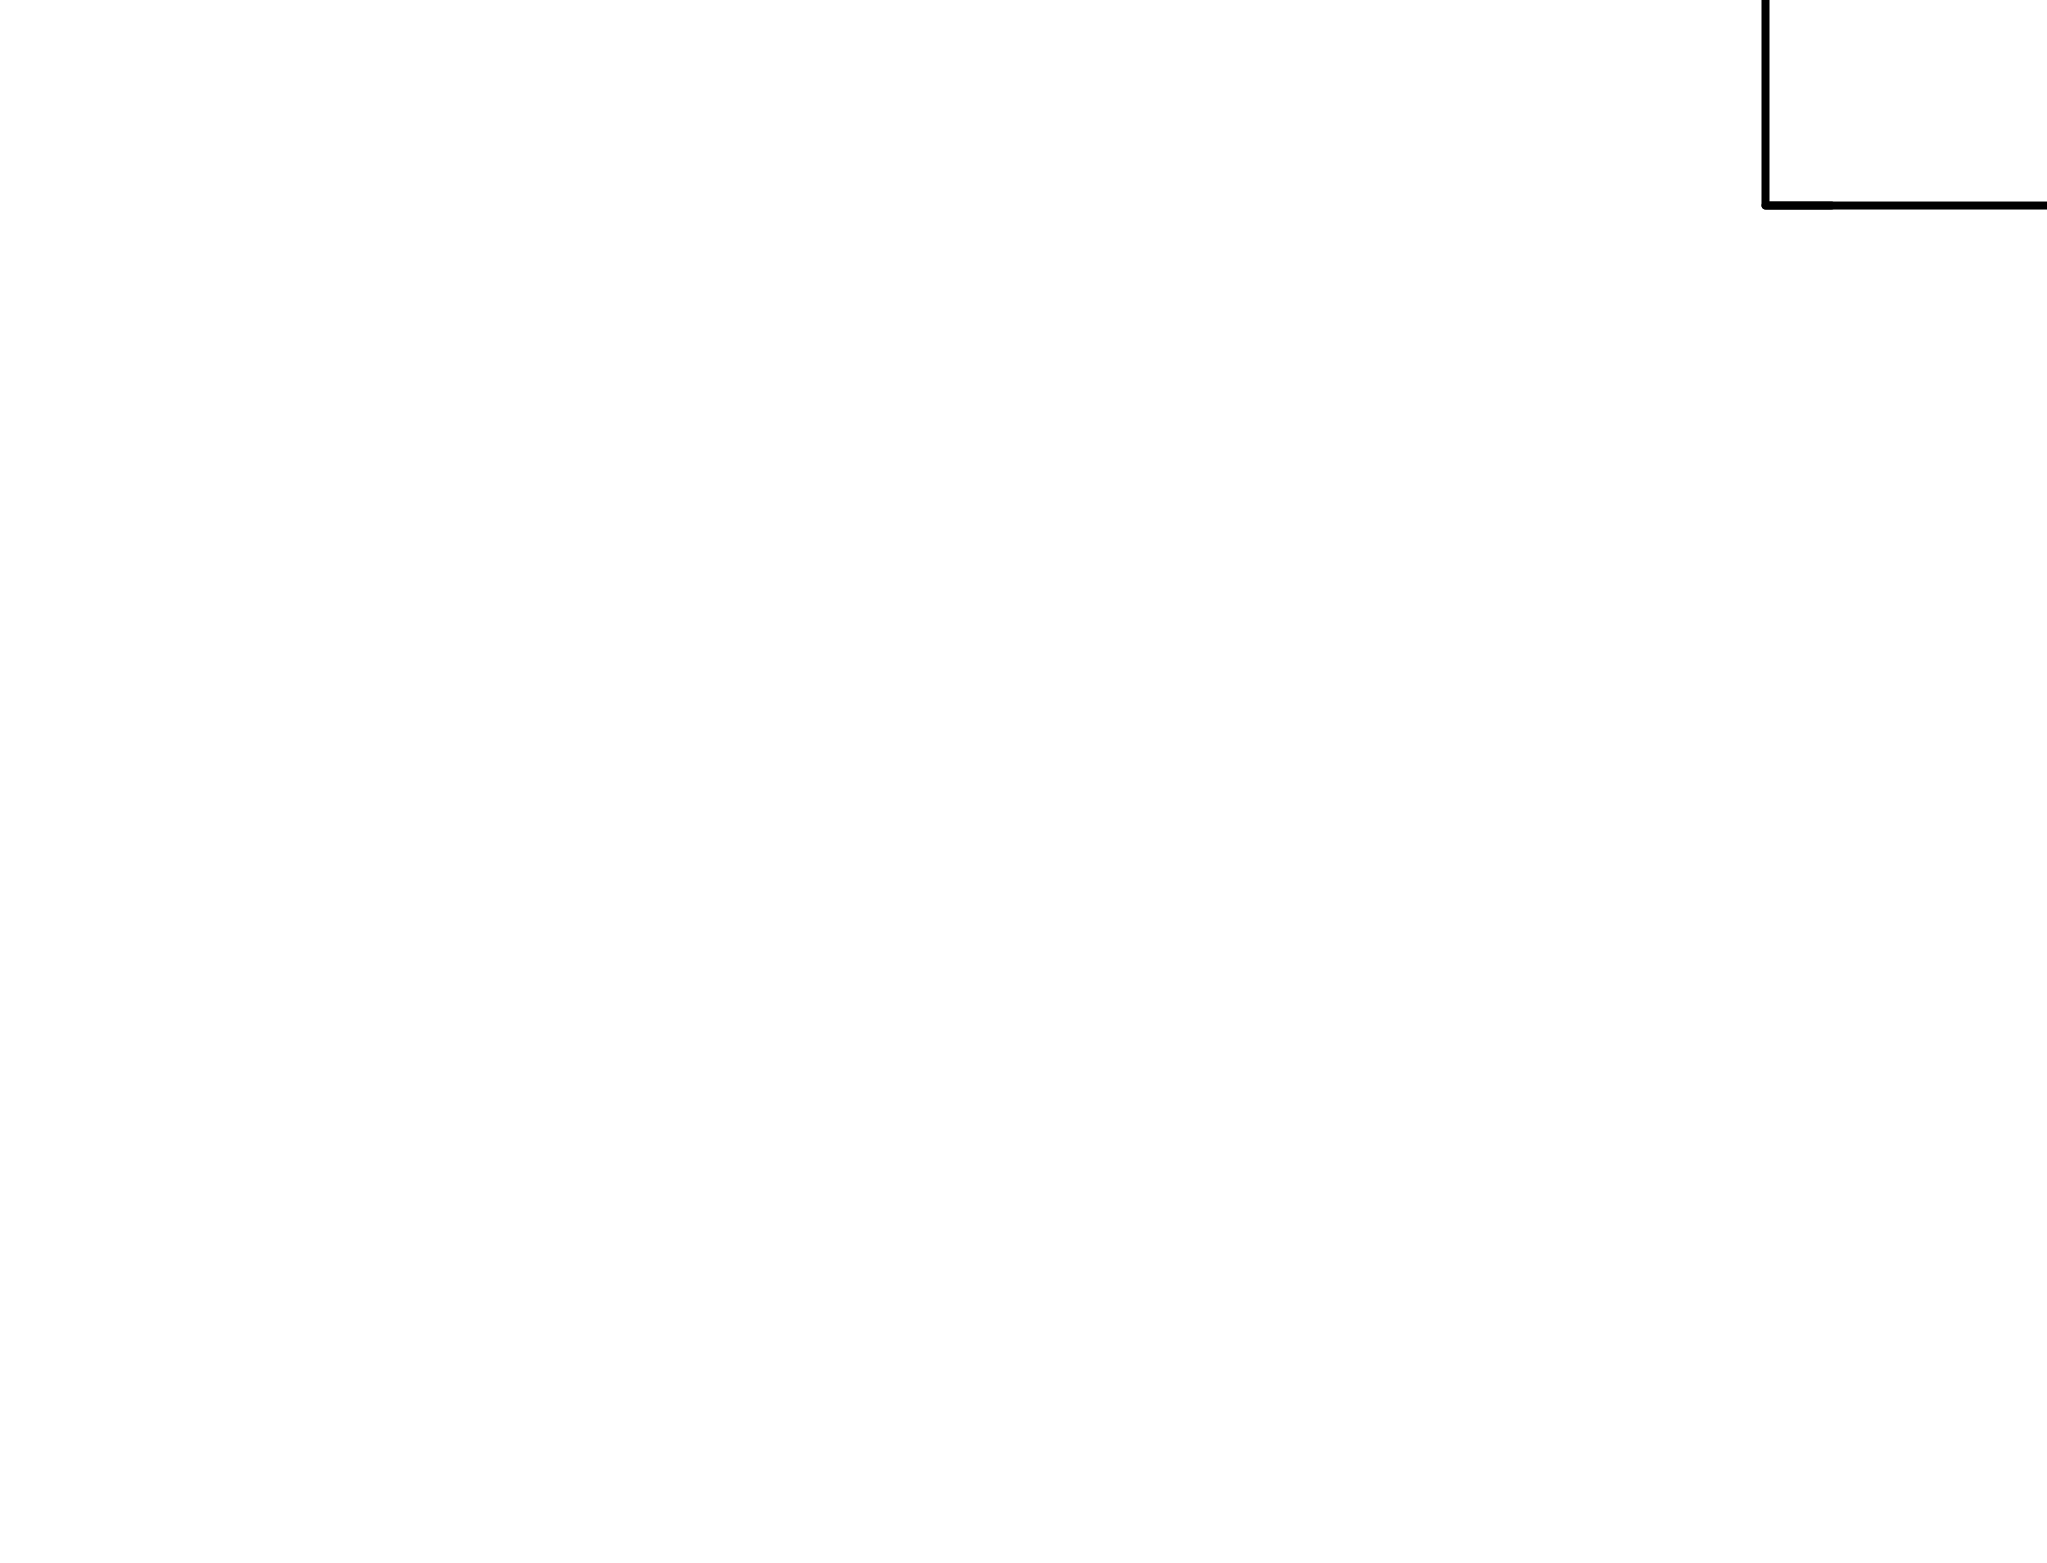

     3 channels (1-3) ignored in spectrum #     1
     2 channels (16-17) ignored in spectrum #     1



In [3]:
Plot.device ="/svg"
Plot.xAxis="keV"
Plot.xLog=True
Plot.yLog=True
Plot.addCommand("Rescale Y 0.00001 0.05")
Plot("data")
spec.ignore("**-0.5 12.0-**")


Model TBabs<1>*bremss<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bremss     kT         keV      7.00000      +/-  0.0          
   3    2   bremss     norm                1.00000      +/-  0.0          
________________________________________________________________________

tbvabs Version 2.3
Cosmic absorption with grains and H2, modified from
Wilms, Allen, & McCray, 2000, ApJ 542, 914-924
Questions: Joern Wilms
joern.wilms@sternwarte.uni-erlangen.de
joern.wilms@fau.de

http://pulsar.sternwarte.uni-erlangen.de/wilms/research/tbabs/

PLEASE NOTICE:
To get the model described by the above paper
you will also have to set the abundances:
   abund wilm

Note that this routine ignores the current cross section setting
as it always HAS to use the Verner cross sections as a baseline.

Fit statistic  : Chi-Squared              1.317065e+11     using 12 bins.

T

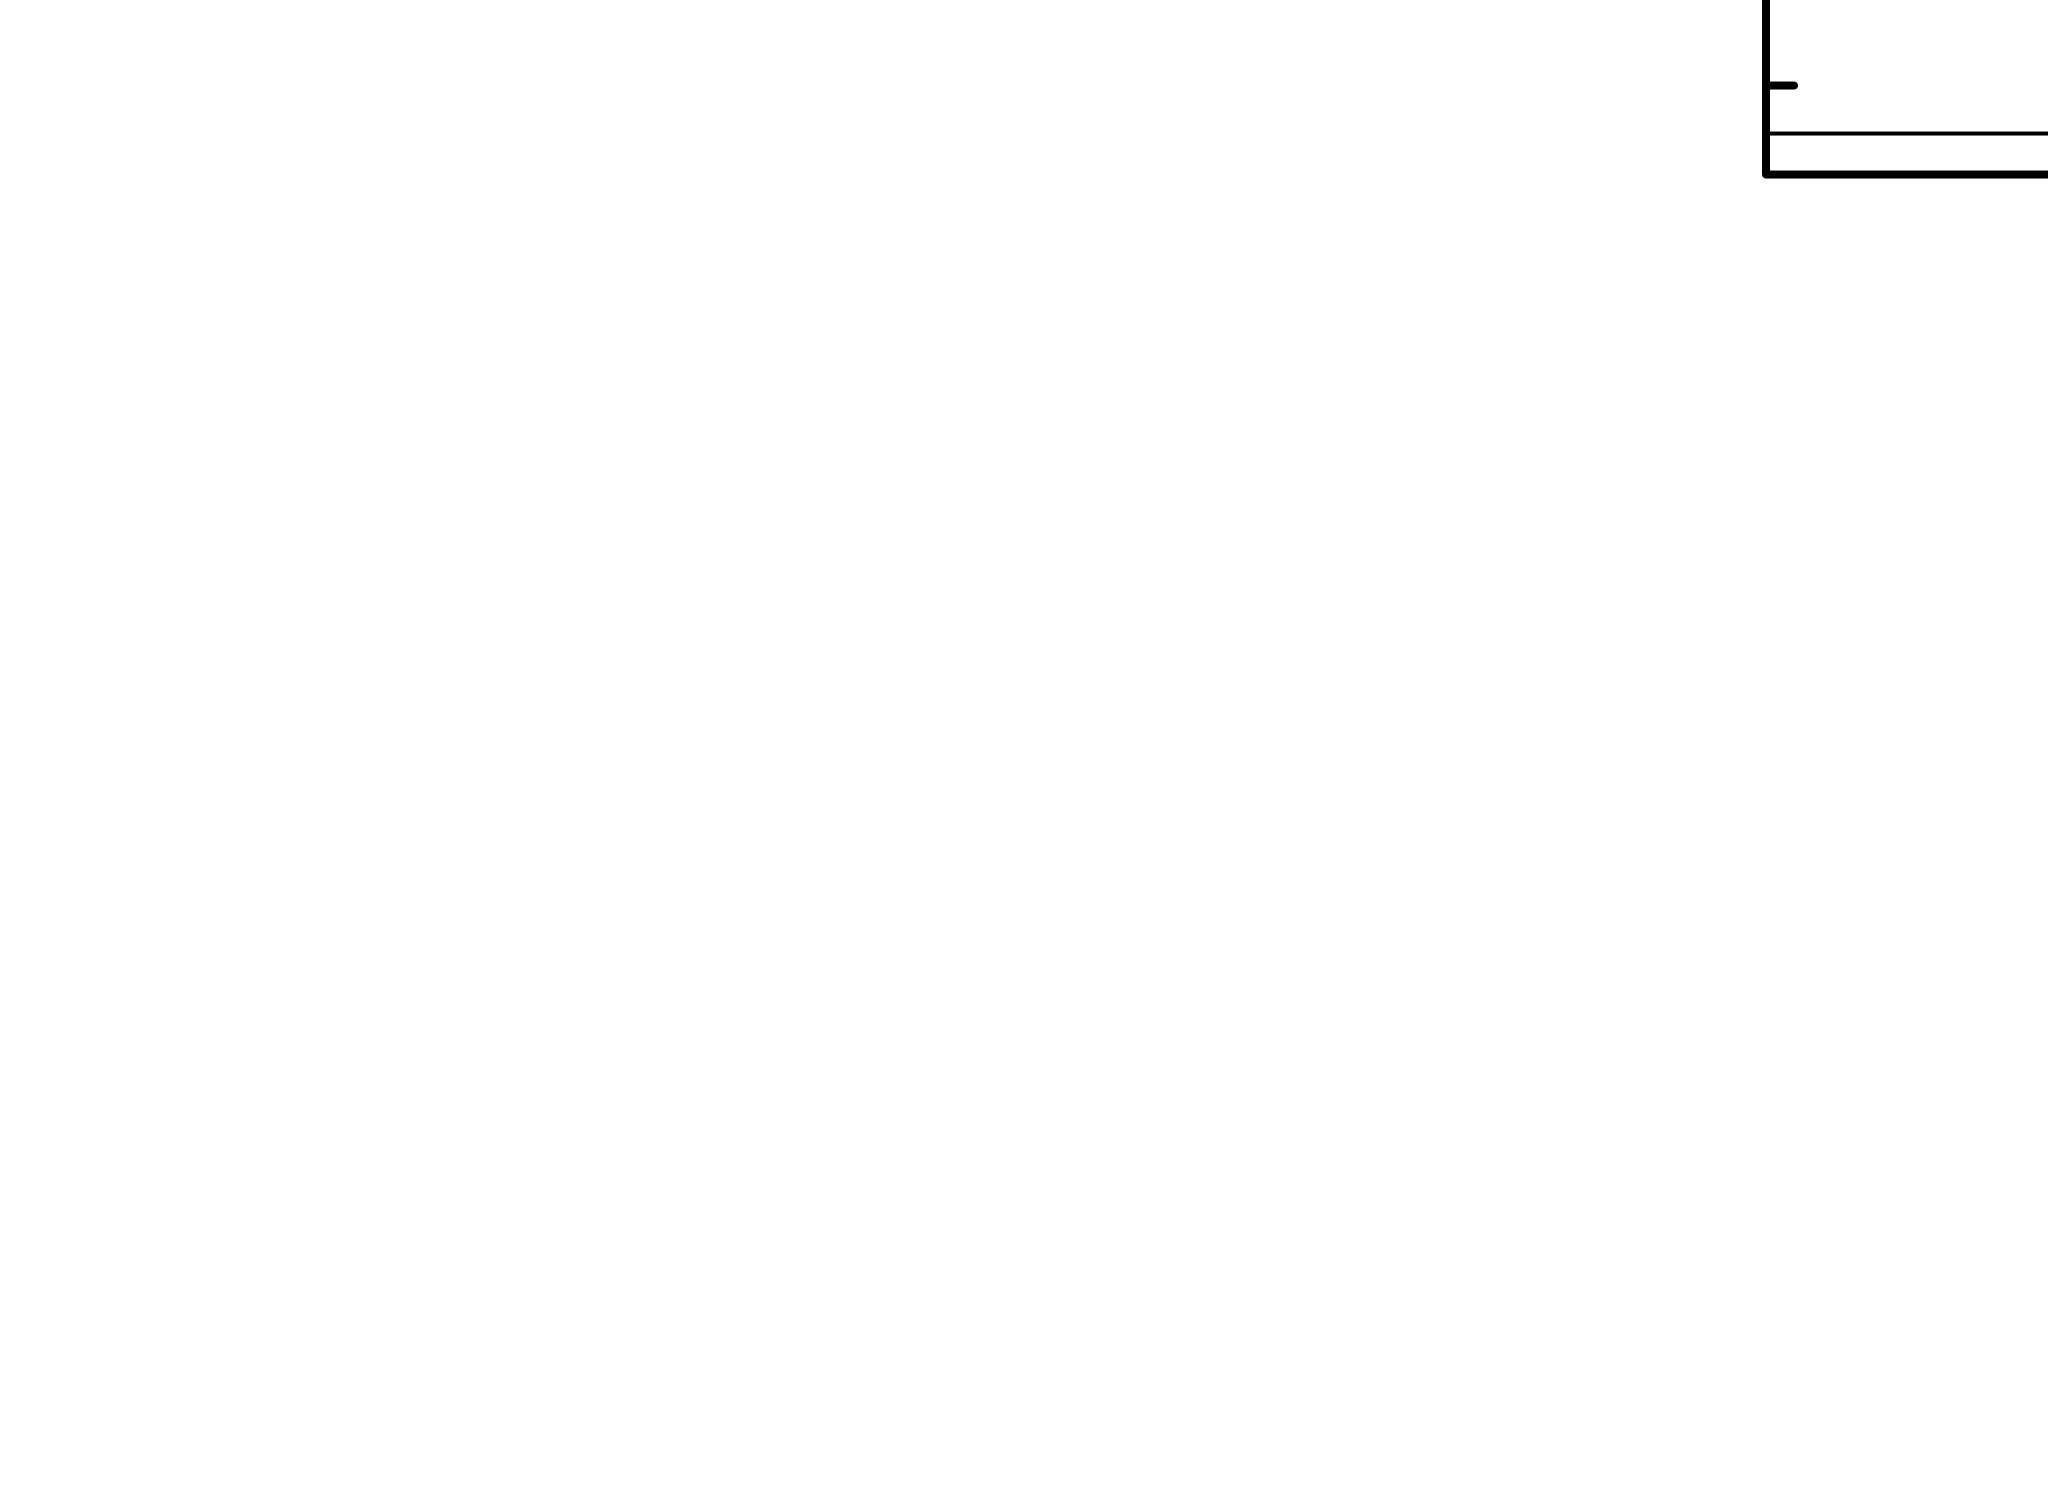

In [4]:
AllModels.clear()
mo = Model("tbabs*bremss")
Fit.perform()
Plot("data resid")

In [5]:
Fit.error("1")
Fit.error("2")

 Parameter   Confidence Range (2.706)
     1      1.72725      5.86335    (-1.24219,2.89391)
 Parameter   Confidence Range (2.706)
***Warning: Zero alpha-matrix diagonal element for parameter 1
***Warning: Zero alpha-matrix diagonal element for parameter 3
 Parameter 1 is pegged at 2.96944 due to zero or negative pivot element, likely
 caused by the fit being insensitive to the parameter.
 Parameter 3 is pegged at 3.39892e-05 due to zero or negative pivot element, likely
 caused by the fit being insensitive to the parameter.

 Fit error occurred during lower bound error calculation.

***Warning: Number of trials exceeded before bracketing of delta fit-stat.
Last attempt: 200, with delta statistic: 0.00337358

Continue error search in this direction? 
*** Parameter upper bound is INVALID.

     2            0            0    (-95.2397,-95.2397)



***XSPEC Error:  No variable parameters for fit 


Model TBabs<1>*apec<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   apec       kT         keV      1.00000      +/-  0.0          
   3    2   apec       Abundanc            1.00000      frozen
   4    2   apec       Redshift            0.0          frozen
   5    2   apec       norm                1.00000      +/-  0.0          
________________________________________________________________________

Reading APEC data from 3.0.9


Fit statistic  : Chi-Squared              2.310290e+10     using 12 bins.

Test statistic : Chi-Squared              2.310290e+10     using 12 bins.
 Null hypothesis probability of 0.000000e+00 with 9 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT        5:norm
35.8072      0.613242     -3       10.1935       13.0387   3

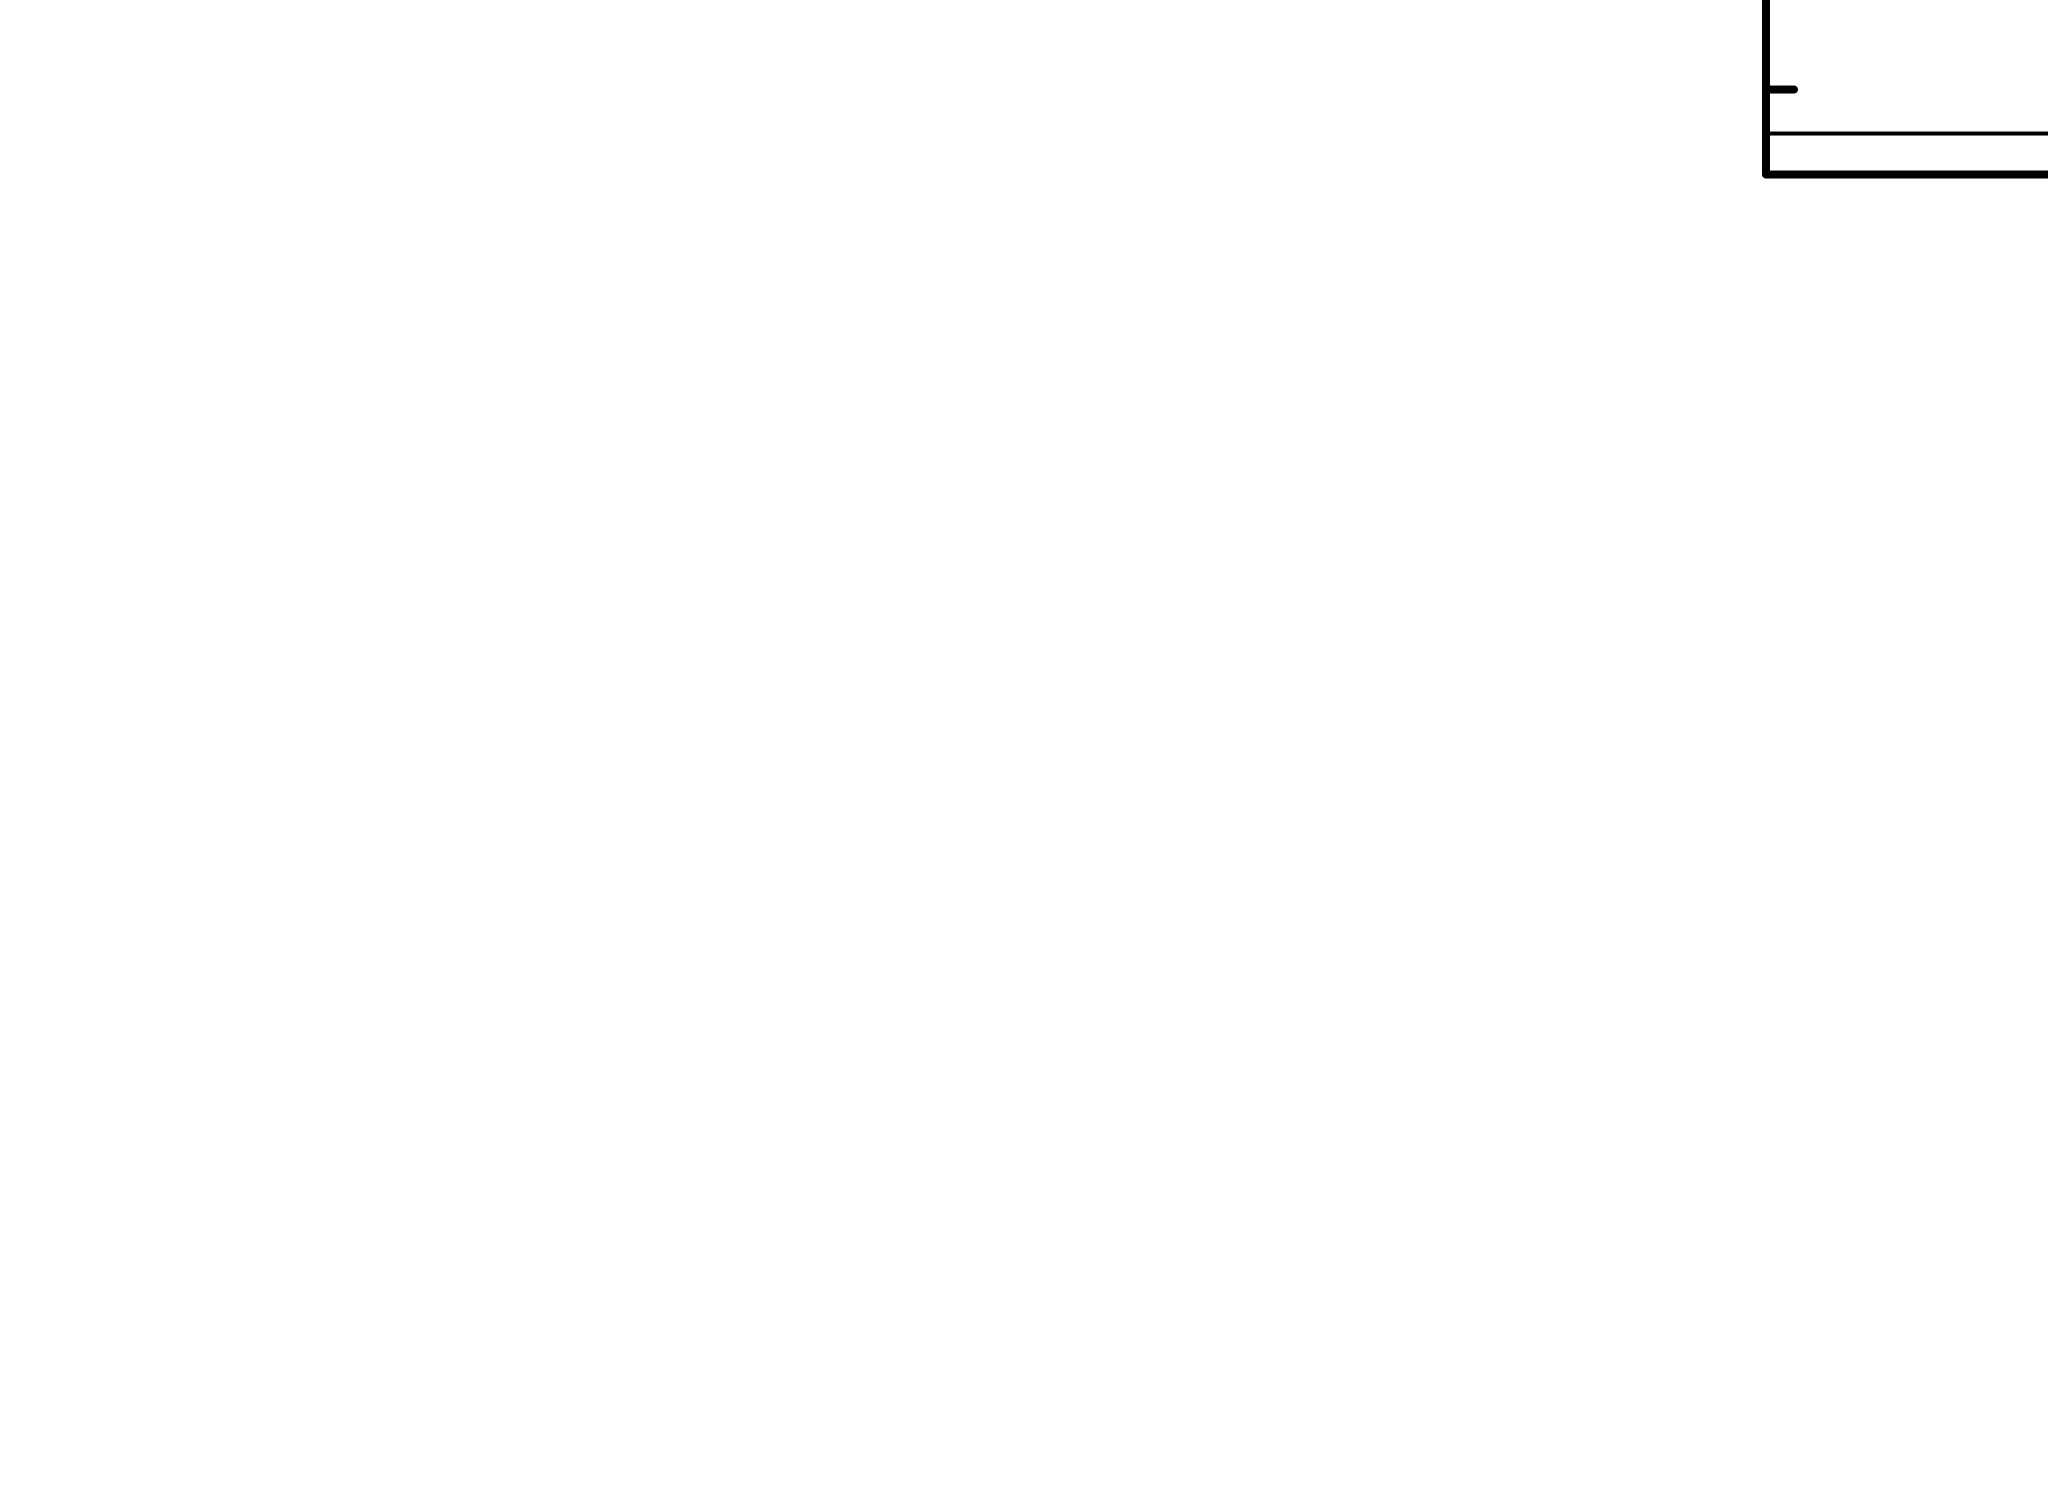

In [6]:
AllModels.clear()
mo = Model("tbabs*apec")
Fit.perform()
Plot("data resid")

In [7]:
Fit.error("1")
Fit.error("2")

 Parameter   Confidence Range (2.706)
     1       1.8069      5.54997    (-1.18527,2.5578)
 Parameter   Confidence Range (2.706)
***Warning: Zero alpha-matrix diagonal element for parameter 1
***Warning: Zero alpha-matrix diagonal element for parameter 5
 Parameter 1 is pegged at 2.99217 due to zero or negative pivot element, likely
 caused by the fit being insensitive to the parameter.
 Parameter 5 is pegged at 8.90641e-05 due to zero or negative pivot element, likely
 caused by the fit being insensitive to the parameter.

 Fit error occurred during lower bound error calculation.
***Warning: Parameter pegged at hard limit: 64
     2            0            0    (-63.9325,-63.9325)



***XSPEC Error:  No variable parameters for fit 


Model TBabs<1>*bbody<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bbody      kT         keV      3.00000      +/-  0.0          
   3    2   bbody      norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              3.094304e+12     using 12 bins.

Test statistic : Chi-Squared              3.094304e+12     using 12 bins.
 Null hypothesis probability of 0.000000e+00 with 9 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT        3:norm
17.7658      0.302599     -1      0.372094       2.83485   2.84181e-06
17.2445      50695.8      -1      0.987180       2.58032   2.53884e-06
17.079       32507.3      -2       1.19208       1.86443   1.33339e-06
16

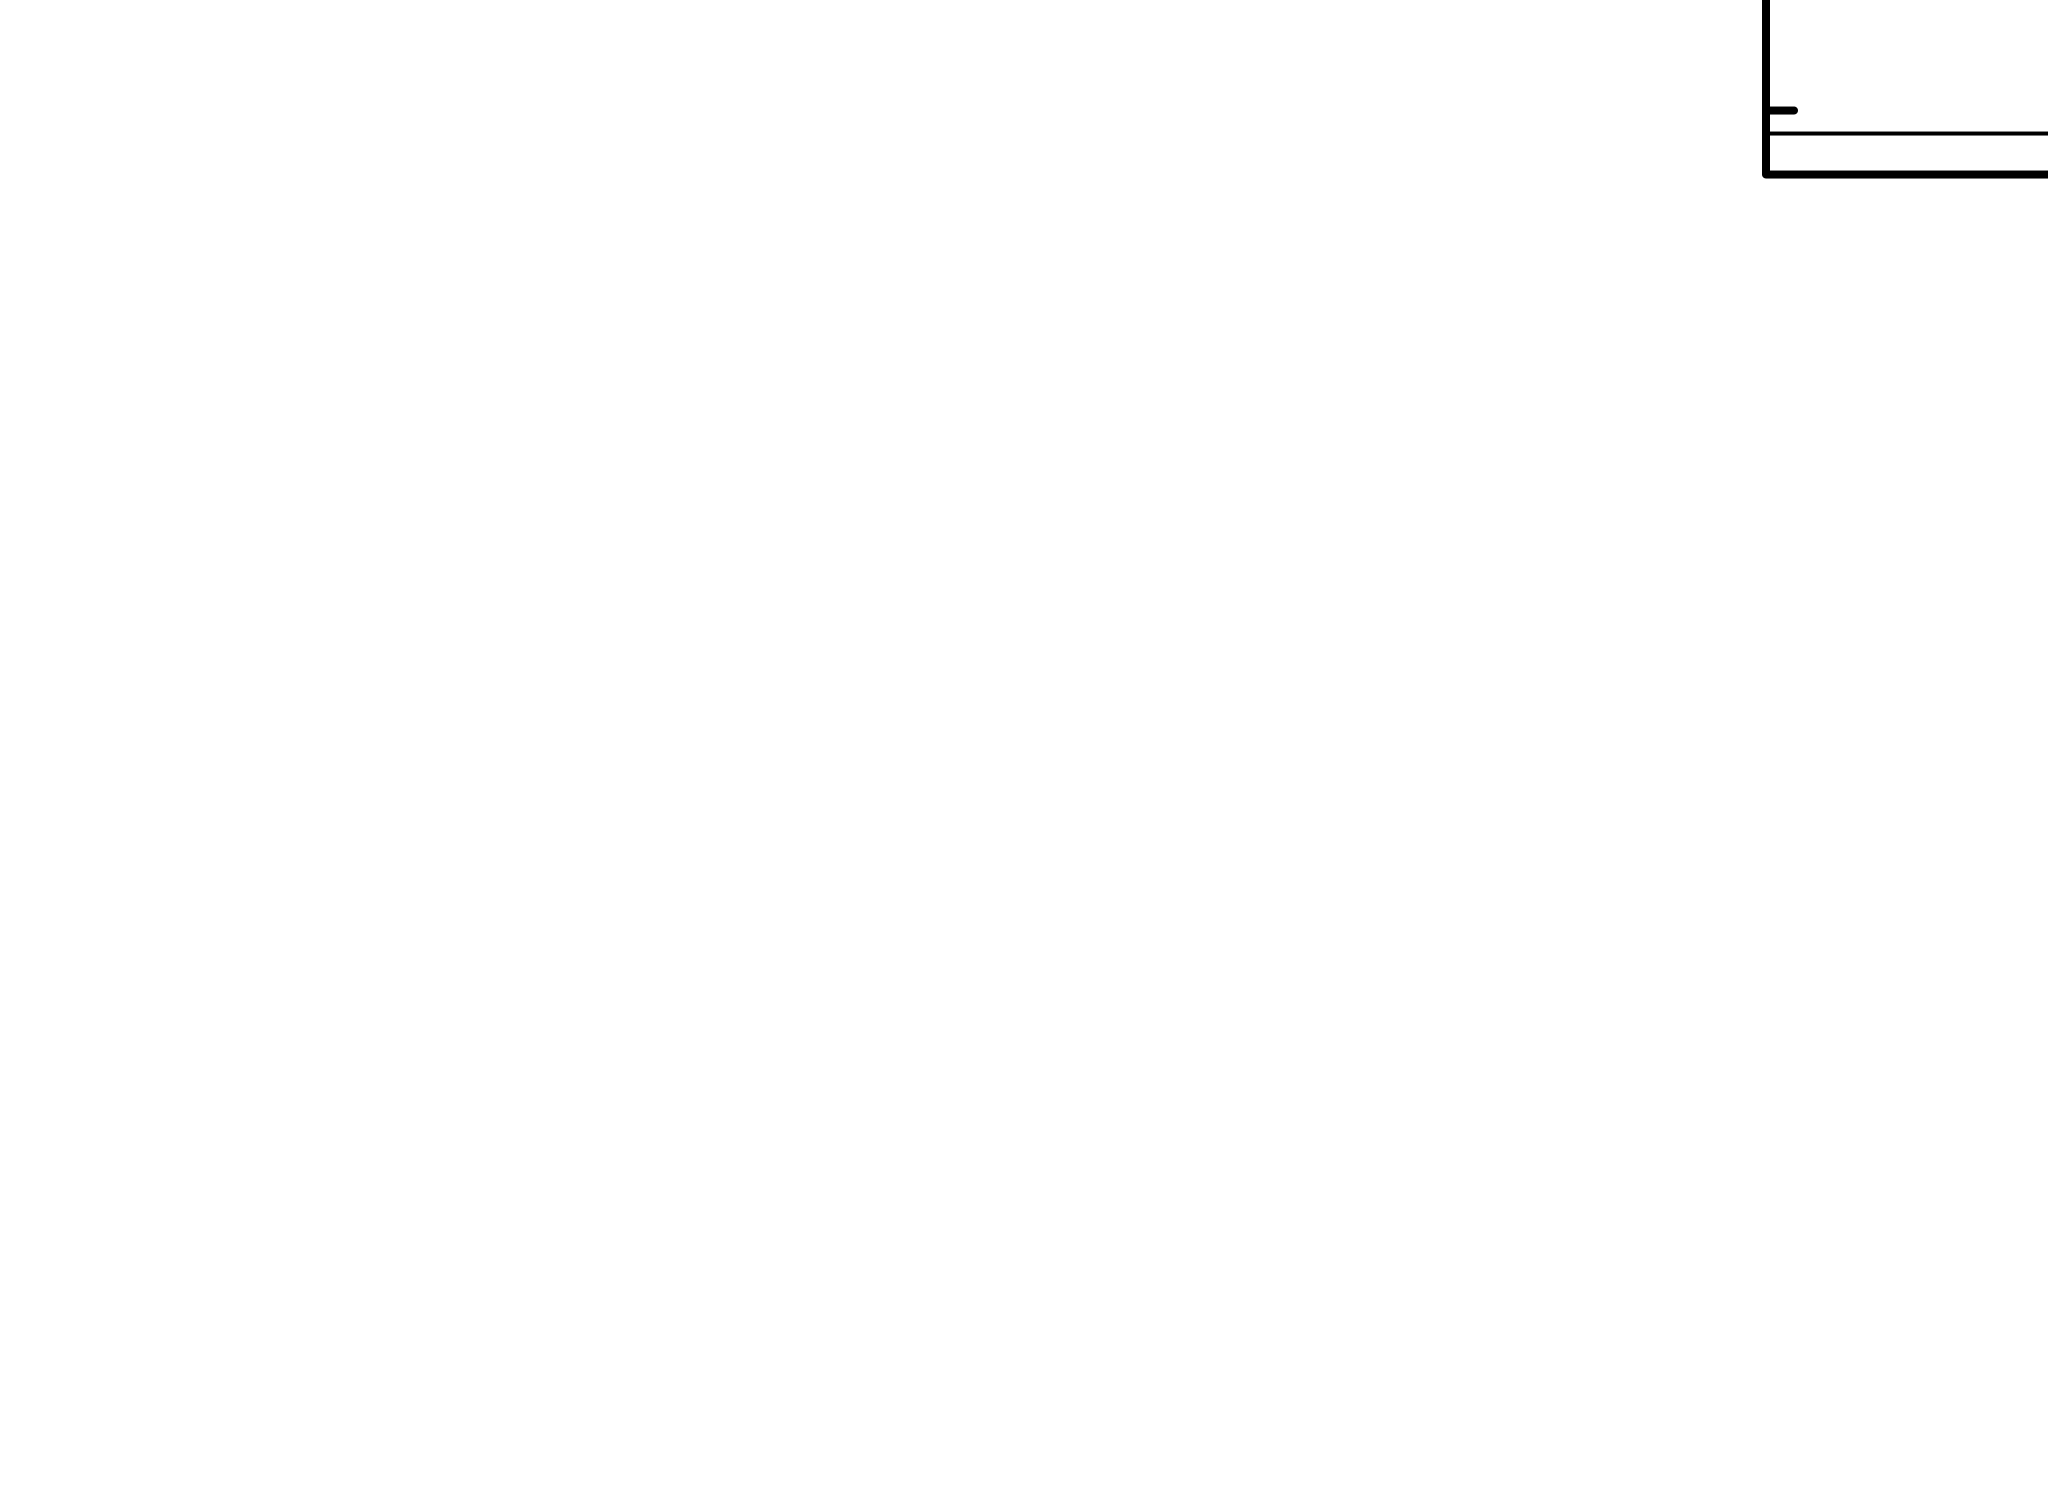

In [8]:
AllModels.clear()
mo1 = Model("tbabs*bbody")
Fit.perform()
Plot("data resid")

In [9]:
Fit.error("1")
Fit.error("2")

 Parameter   Confidence Range (2.706)
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT        3:norm
16.2449      0.0213367    -1       1.39169       1.69664   1.41692e-06
 Variances and Principal Axes
                 1        2        3  
 5.6579E-14| -0.0000  -0.0000   1.0000  
 1.6514E-01| -0.2439  -0.9698  -0.0000  
 3.0161E+00|  0.9698  -0.2439  -0.0000  
----------------------------------------

  Covariance Matrix
        1           2           3   
   2.847e+00  -6.742e-01  -2.453e-07
  -6.742e-01   3.347e-01   2.336e-07
  -2.453e-07   2.336e-07   2.538e-13
------------------------------------

Model TBabs<1>*bbody<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.39169      +/-  1.68719      
   2    2   bbody      kT         keV      1.69664      +/-  0.578508     
   3    2   bbody      norm                1.41692E-06  +/-  5.03766E-07  


Model TBabs<1>*powerlaw<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   powerlaw   PhoIndex            1.00000      +/-  0.0          
   3    2   powerlaw   norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              7.206930e+11     using 12 bins.

Test statistic : Chi-Squared              7.206930e+11     using 12 bins.
 Null hypothesis probability of 0.000000e+00 with 9 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH    2:PhoIndex        3:norm
18.6666      2.85273      -3       3.27911       1.56149   1.50648e-05
14.7582      180125       -4       3.31078       1.41382   1.95522e-05
14.6543      38482.2      -5       2.98612       1.33503   1.56232e-05

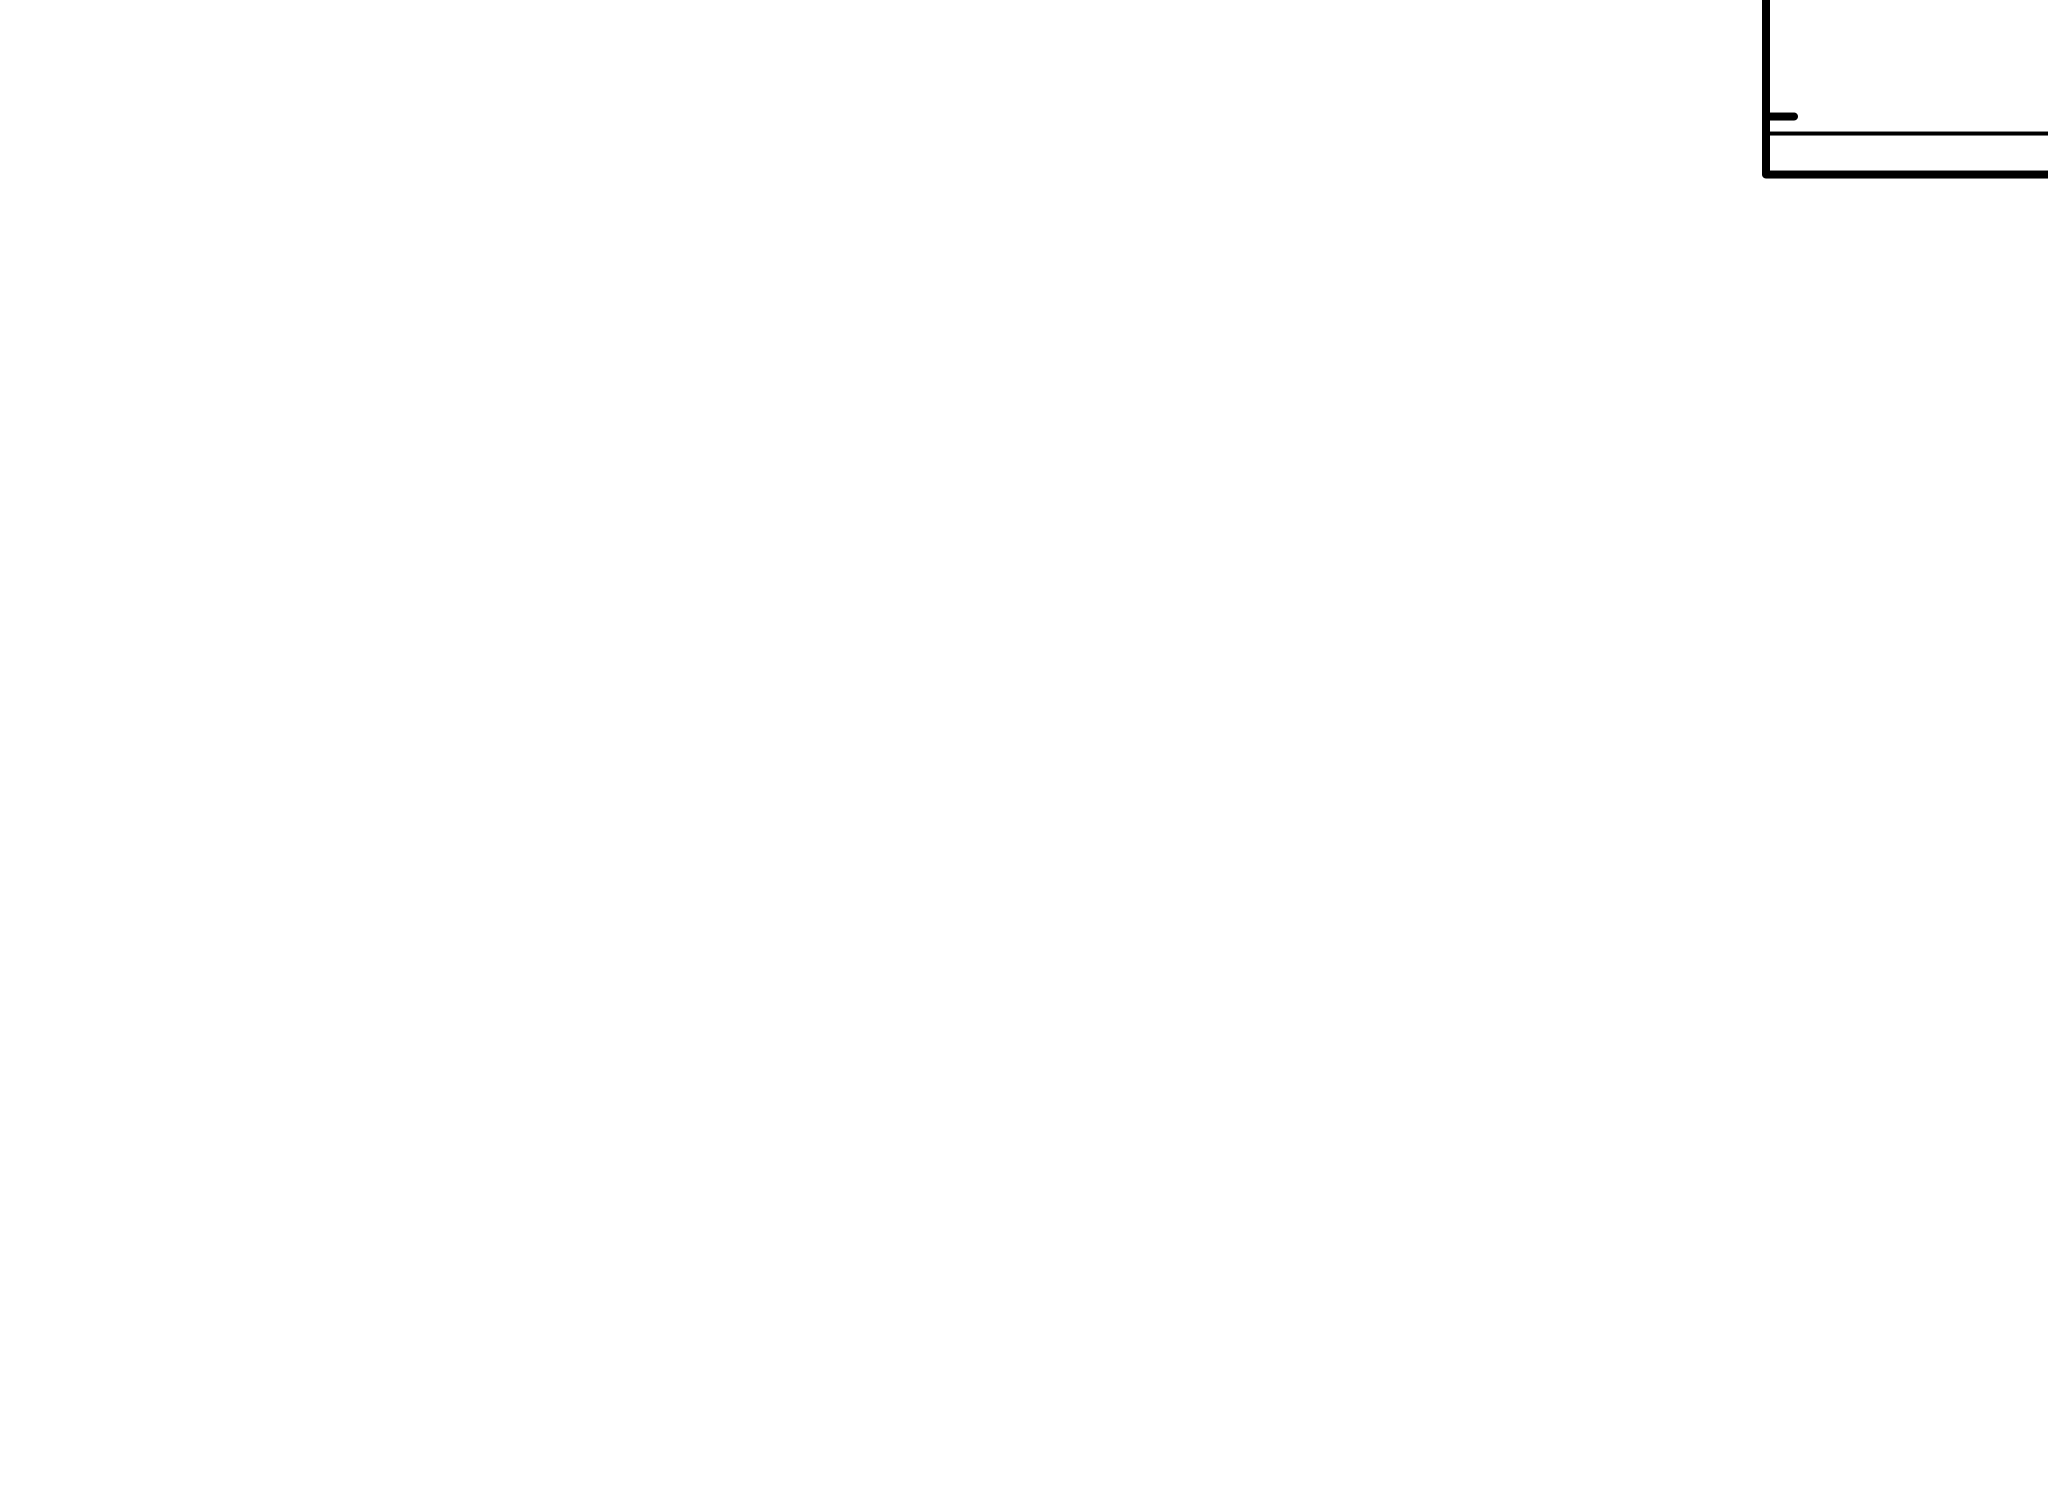

In [10]:
AllModels.clear()
mo = Model("tbabs*powerlaw")
Fit.perform()
Plot("data resid")

In [11]:
Fit.error("1")
Fit.error("2")

 Parameter   Confidence Range (2.706)
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH    2:PhoIndex        3:norm
14.6263      0.0197575    -2       3.17252       1.41986   1.82887e-05
 Variances and Principal Axes
                 1        2        3  
 1.0505E-11| -0.0000  -0.0000   1.0000  
 1.9827E-01|  0.3331  -0.9429  -0.0000  
 6.4231E+00|  0.9429   0.3331   0.0000  
----------------------------------------

  Covariance Matrix
        1           2           3   
   5.733e+00   1.955e+00   6.603e-05
   1.955e+00   8.888e-01   2.844e-05
   6.603e-05   2.844e-05   9.288e-10
------------------------------------

Model TBabs<1>*powerlaw<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    3.17252      +/-  2.39427      
   2    2   powerlaw   PhoIndex            1.41986      +/-  0.942767     
   3    2   powerlaw   norm                1.82887E-05  +/-  3.04770E-0

In [12]:
AllModels.calcFlux(".2 12.0")

 Model Flux 1.3456e-05 photons (1.1857e-13 ergs/cm^2/s) range (0.20000 - 12.000 keV)


In [13]:
plx = 0.125
d_kpc = 1/plx
F_x = 1.1668*10**-13

L_x = 4*3.14*F_x*(d_kpc*3.086*10**21)**2
print(L_x)

8.932188452298753e+32


In [14]:
import numpy as np
print(np.log10(L_x))

32.95095787728902


In [15]:
F_opt = 1.05*10**-5 * 10**(-0.4*20.7)
print('Optical Flux: ',F_opt)
print('F_x / F_opt: ', np.log10(F_x/F_opt))

Optical Flux:  5.510478332622621e-14
F_x / F_opt:  0.32580712137975637


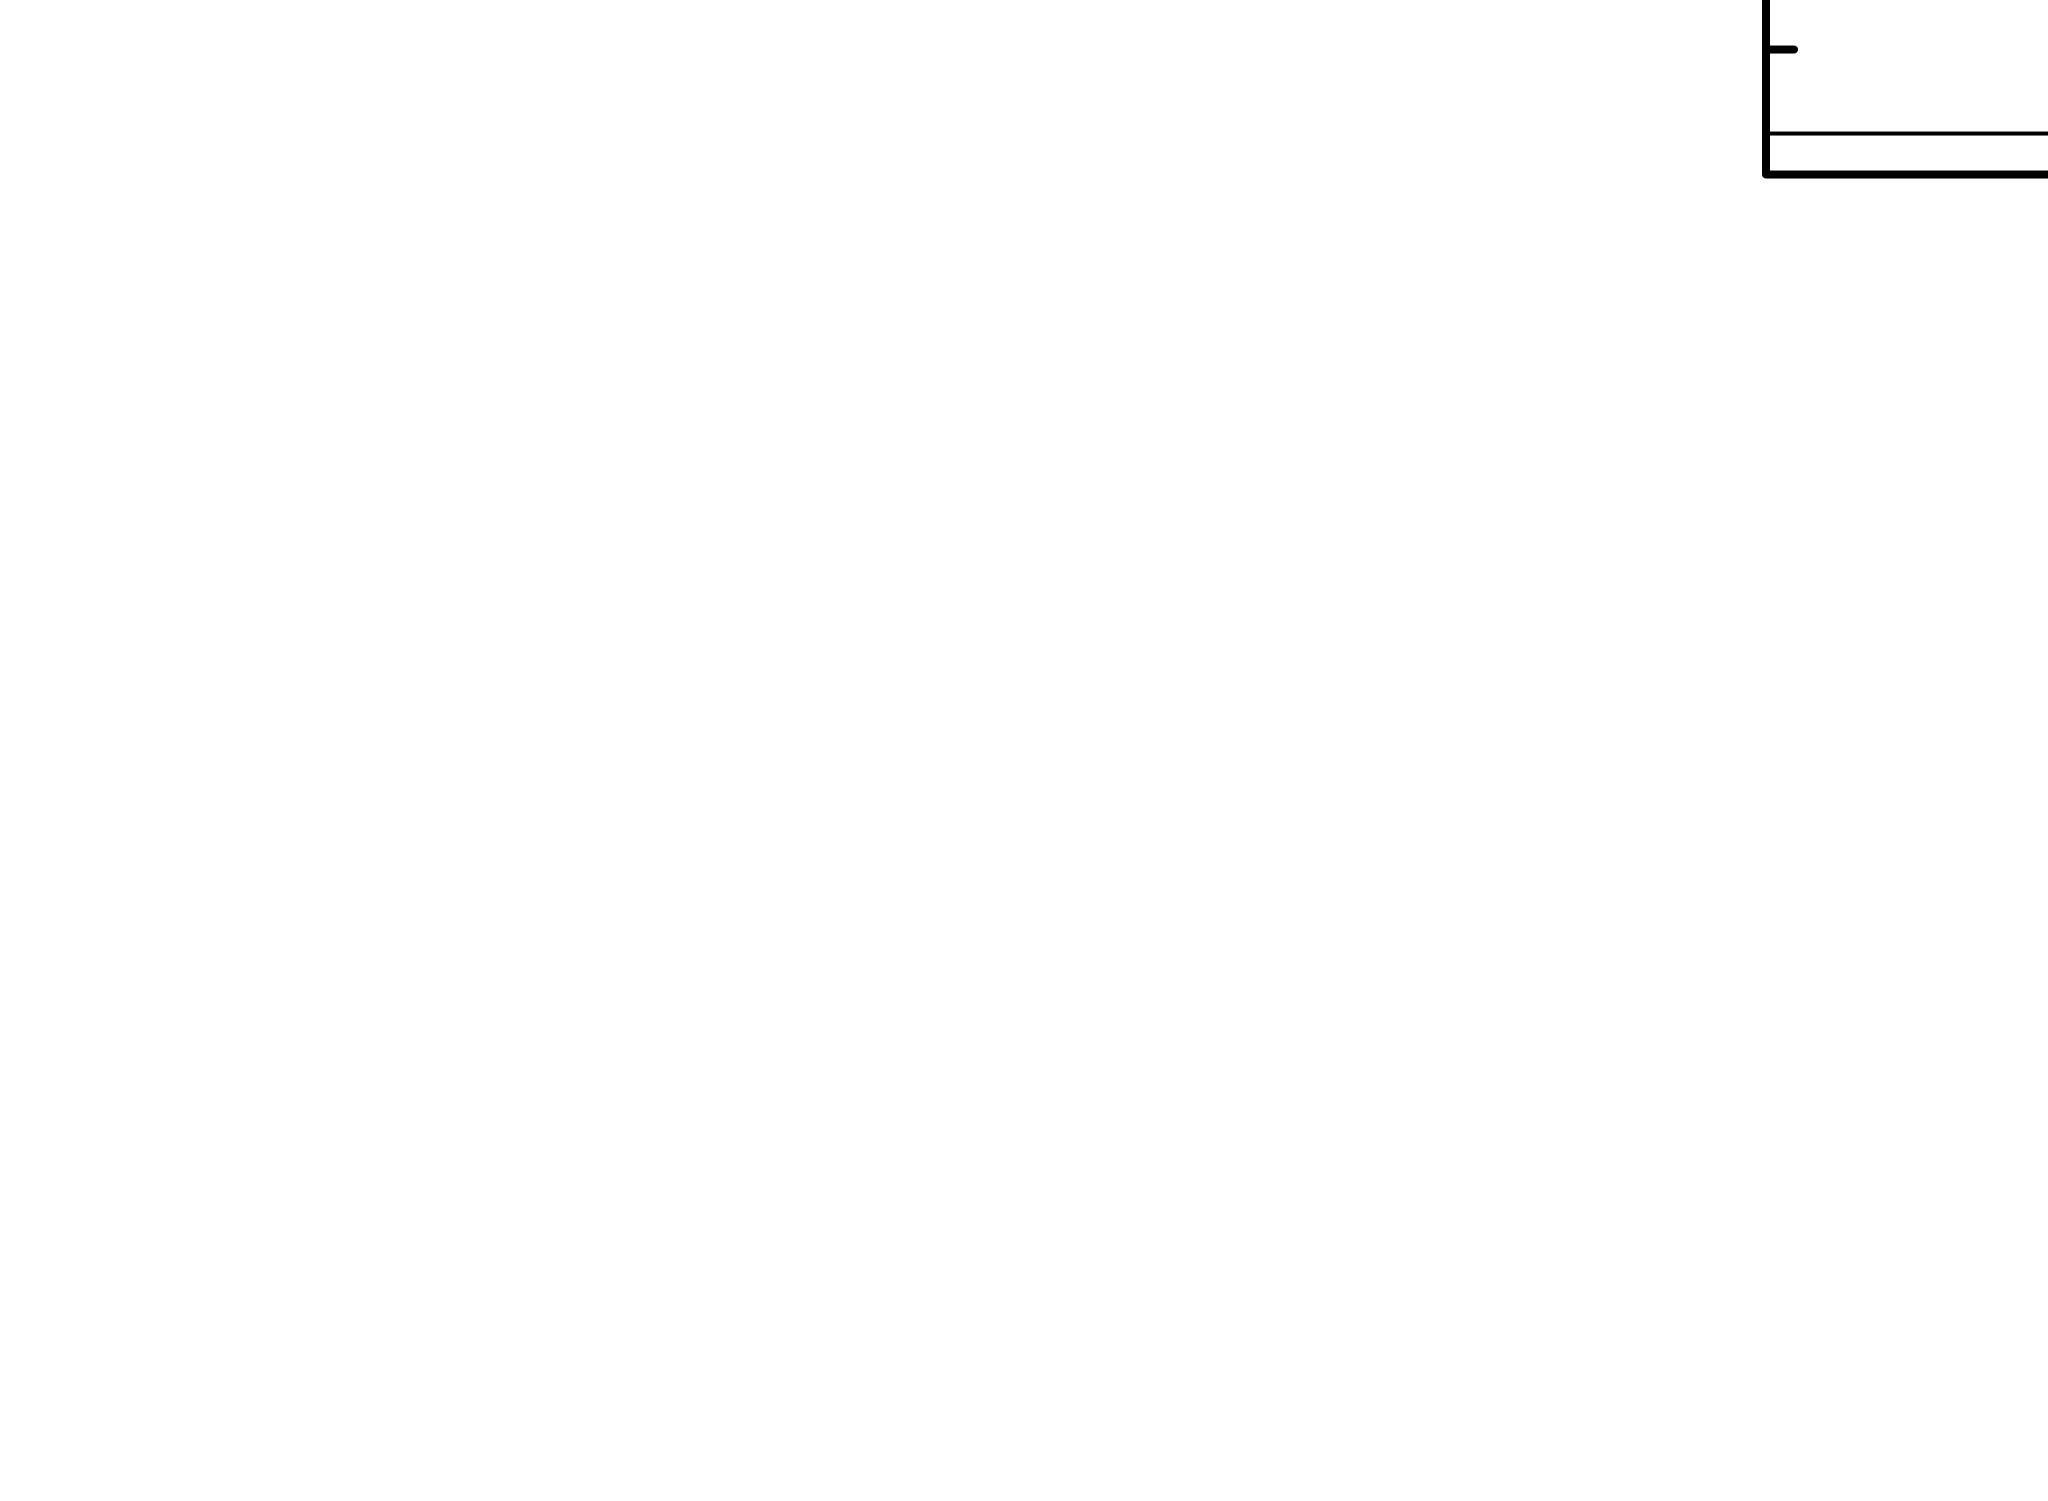


Model TBabs<1>(bbody<2> + powerlaw<3>) Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bbody      kT         keV      3.00000      +/-  0.0          
   3    2   bbody      norm                1.00000      +/-  0.0          
   4    3   powerlaw   PhoIndex            1.00000      +/-  0.0          
   5    3   powerlaw   norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              6.417309e+12     using 12 bins.

Test statistic : Chi-Squared              6.417309e+12     using 12 bins.
 Null hypothesis probability of 0.000000e+00 with 7 degrees of freedom
 Current data and model not fit yet.

Fit statistic  : Chi-Squared              6.974878e+13     using 12 bins.

Test statistic : Chi-Squared              6.974878e+13     using 12 bins.
 Null hypothesis 

In [16]:
AllModels.clear()
mo = Model("tbabs*(bbody+powerlaw)")
mo.bbody.kT = 1.0
mo.powerlaw.PhoIndex = 2.5
Fit.perform()
Plot("data resid")


Model TBabs<1>(apec<2> + apec<3>) Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   apec       kT         keV      1.00000      +/-  0.0          
   3    2   apec       Abundanc            1.00000      frozen
   4    2   apec       Redshift            0.0          frozen
   5    2   apec       norm                1.00000      +/-  0.0          
   6    3   apec       kT         keV      1.00000      +/-  0.0          
   7    3   apec       Abundanc            1.00000      frozen
   8    3   apec       Redshift            0.0          frozen
   9    3   apec       norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              9.241232e+10     using 12 bins.

Test statistic : Chi-Squared              9.241232e+10     using 12 bins.
 Null hypothesis probability

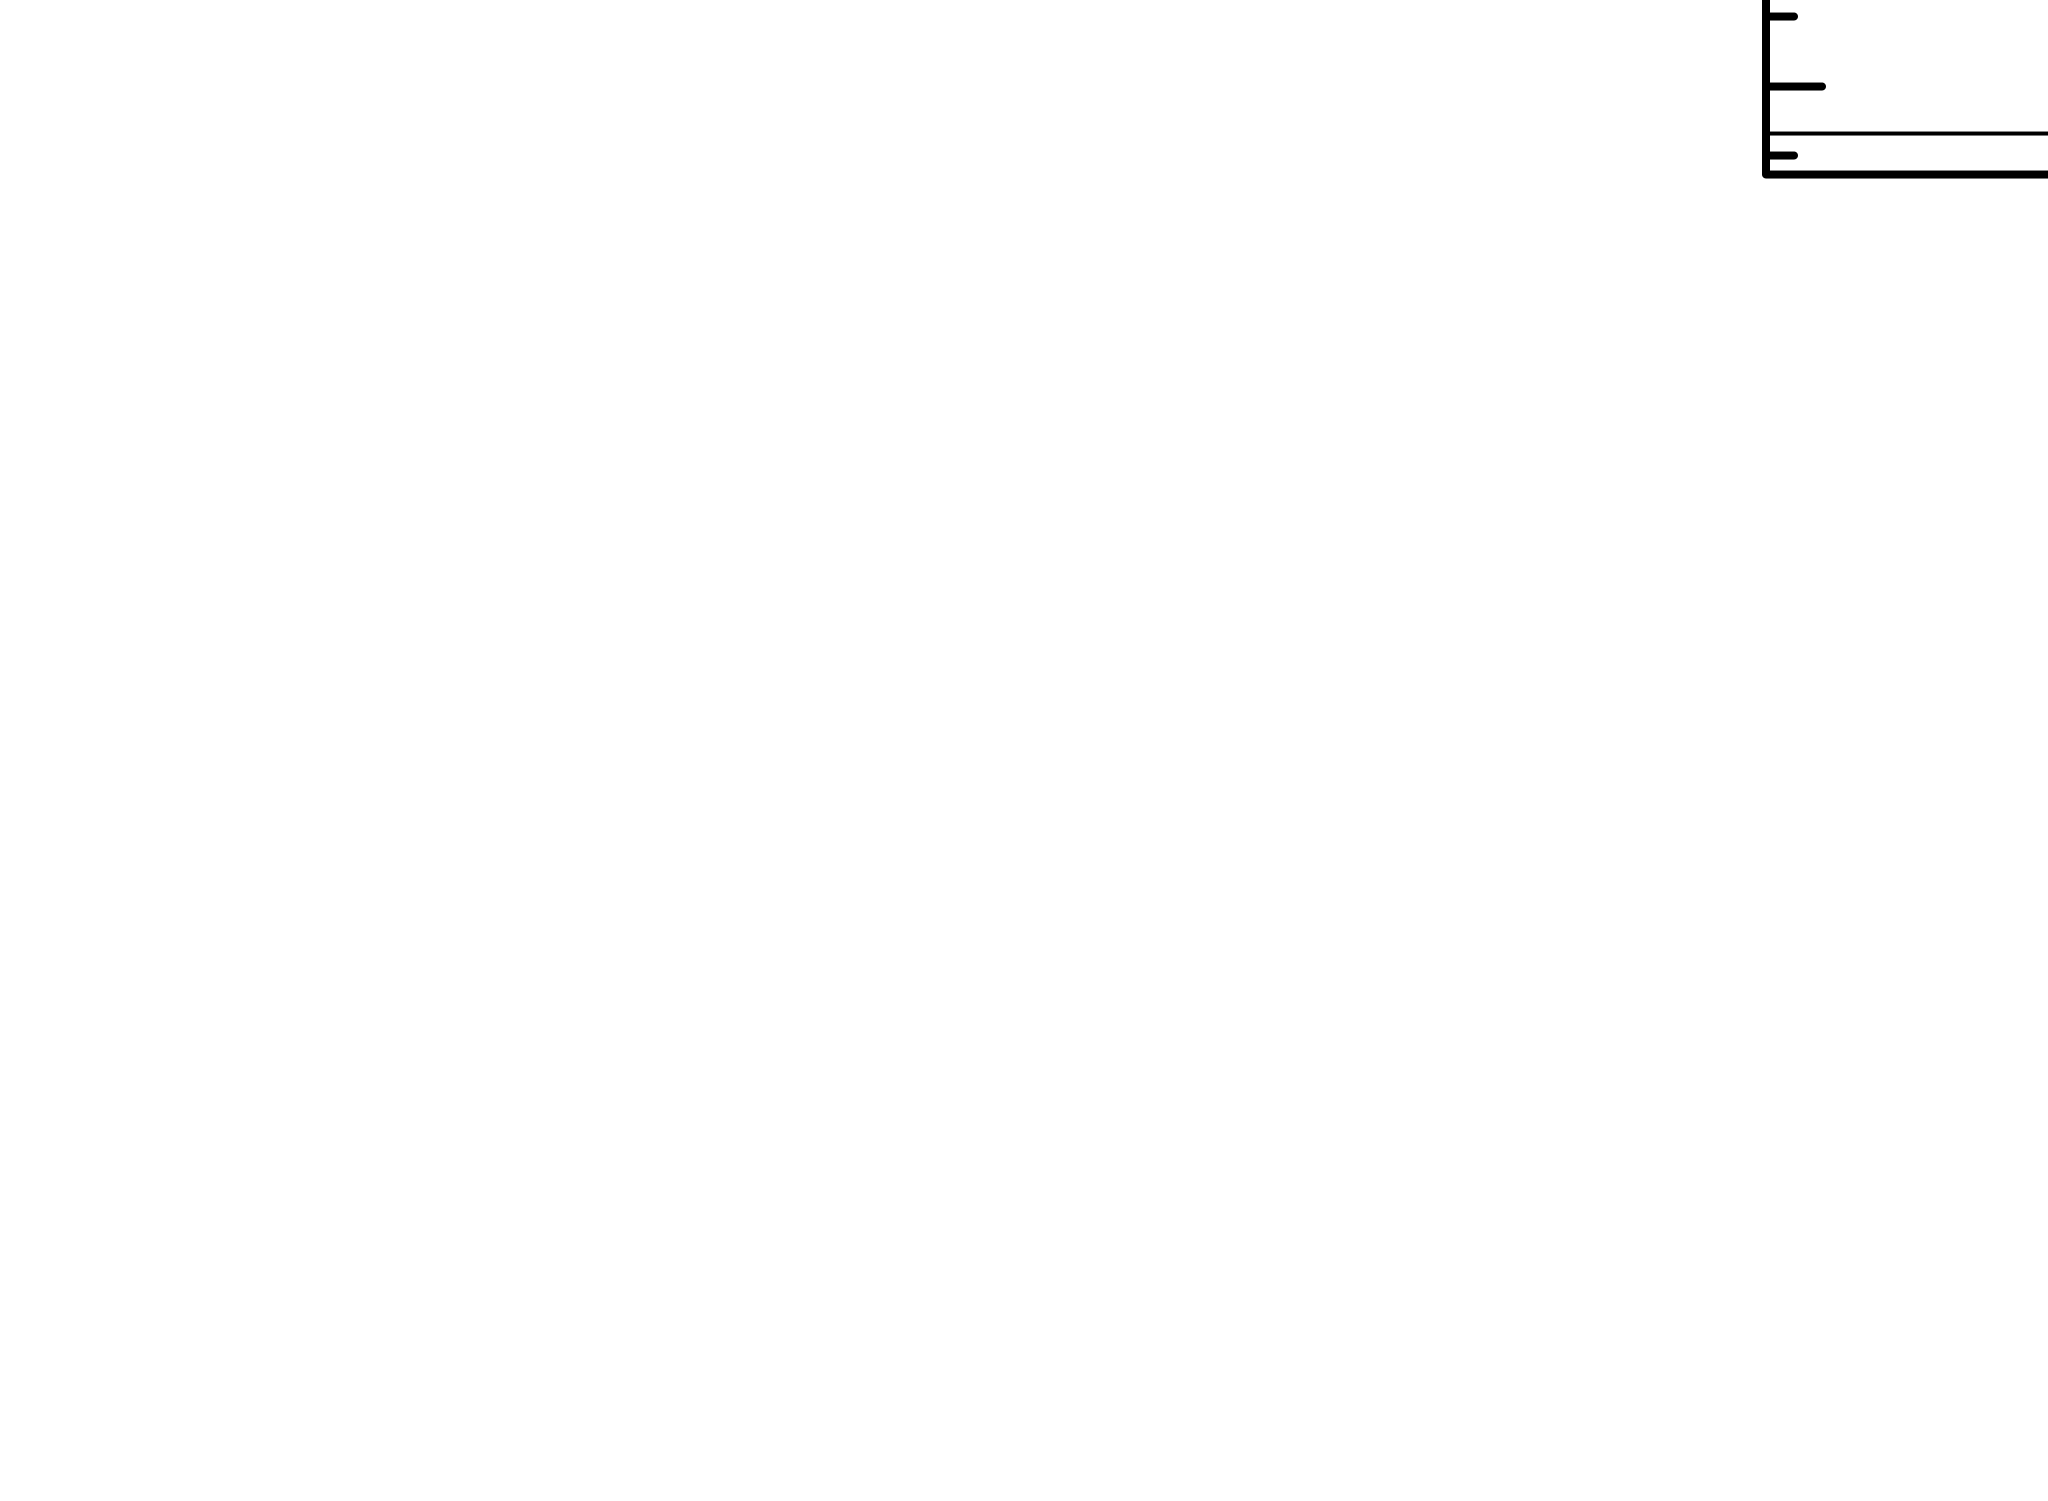

In [17]:
AllModels.clear()
mo = Model("tbabs*(apec+apec)")
mo.apec.kT = 0.5
mo.apec_3.kT = 4.0
Fit.perform()
Plot("data resid")